In [48]:
import pandas as pd
import matplotlib
matplotlib.rcParams["figure.figsize"] = (16,9)

In [49]:
df = pd.read_csv("data.csv")
df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


In [50]:
df.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [52]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [53]:
# convert age & education to int
df.Age = df.Age.astype(int)
df.Education = df.Education.astype(int)

In [54]:
# remove age outlier
q3, q1 = df["Age"].quantile([0.75, 0.25])
iqr = q3 - q1

In [55]:
df2 = df[(df["Age"] > q1 - 1.5 * iqr) & (df["Age"] < q3 + 1.5 * iqr)]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Introversion Score'}>,
        <Axes: title={'center': 'Sensing Score'}>],
       [<Axes: title={'center': 'Thinking Score'}>,
        <Axes: title={'center': 'Judging Score'}>]], dtype=object)

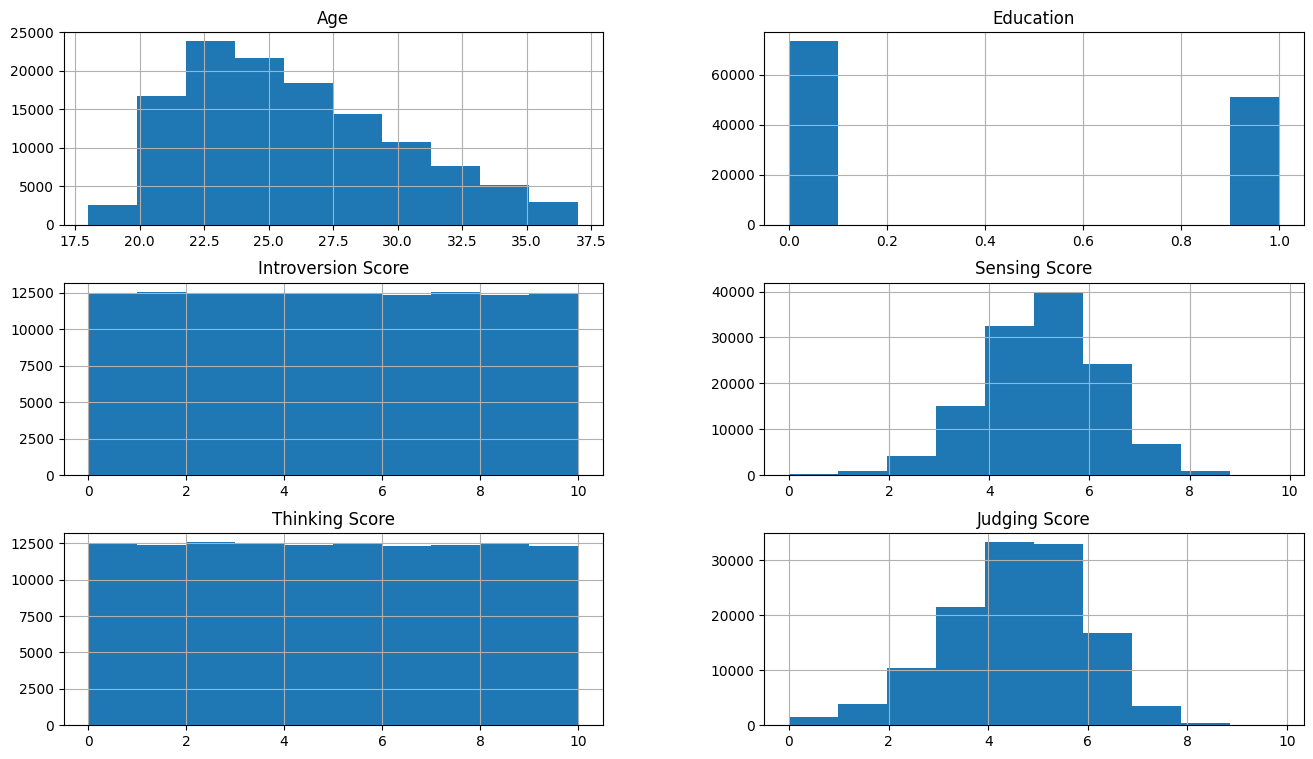

In [56]:
# check for non normal distribution
df2.hist()

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
lab = LabelEncoder()
def labeling(df, cols):
    for col in cols:
        df[col] = lab.fit_transform(df[col])
    return df
df3 = labeling(df2,["Gender","Interest","Personality"])
df3

C:\Users\wirin\AppData\Local\Temp\ipykernel_17656\3886340760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = lab.fit_transform(df[col])
C:\Users\wirin\AppData\Local\Temp\ipykernel_17656\3886340760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = lab.fit_transform(df[col])
C:\Users\wirin\AppData\Local\Temp\ipykernel_17656\3886340760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19,1,0,9.47080,7.141434,6.03696,4.360278,4,1
1,27,0,0,5.85392,6.160195,0.80552,4.221421,2,5
2,21,0,0,7.08615,3.388433,2.66188,5.127320,4,1
3,28,1,0,2.01892,4.823624,7.30625,5.986550,1,11
4,36,0,1,9.91703,4.755080,5.31469,4.677213,3,1
...,...,...,...,...,...,...,...,...,...
128056,27,1,0,5.11456,7.764336,5.72341,2.686904,0,7
128057,19,1,0,3.00078,2.525392,4.71081,3.657814,4,9
128058,26,0,1,8.16219,3.433857,2.45531,5.541144,0,1
128059,24,1,0,9.37782,5.077443,1.79598,6.762643,4,0


In [59]:
x = df3.drop(["Personality"], axis=1)
y = df3[["Personality"]]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
tree.score(x_test, y_test)

0.8696421391234419

In [65]:
y_pred = tree.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [67]:
acc = accuracy_score(y_pred, y_test)
acc

0.8696421391234419

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
forest = RandomForestClassifier()
forest.fit(x_test, y_test)

C:\Users\wirin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [70]:
forest.score(x_test, y_test)

1.0

In [71]:
df3["prediction"] = forest.predict(x)

C:\Users\wirin\AppData\Local\Temp\ipykernel_17656\3643592644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["prediction"] = forest.predict(x)


In [76]:
df3["result"] = lab.inverse_transform(df2["Personality"])

C:\Users\wirin\AppData\Local\Temp\ipykernel_17656\1287684597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["result"] = lab.inverse_transform(df2["Personality"])


In [77]:
df3

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,prediction,result
0,19,1,0,9.47080,7.141434,6.03696,4.360278,4,1,1,ENFP
1,27,0,0,5.85392,6.160195,0.80552,4.221421,2,5,5,ESFP
2,21,0,0,7.08615,3.388433,2.66188,5.127320,4,1,1,ENFP
3,28,1,0,2.01892,4.823624,7.30625,5.986550,1,11,11,INTP
4,36,0,1,9.91703,4.755080,5.31469,4.677213,3,1,1,ENFP
...,...,...,...,...,...,...,...,...,...,...,...
128056,27,1,0,5.11456,7.764336,5.72341,2.686904,0,7,7,ESTP
128057,19,1,0,3.00078,2.525392,4.71081,3.657814,4,9,9,INFP
128058,26,0,1,8.16219,3.433857,2.45531,5.541144,0,1,1,ENFP
128059,24,1,0,9.37782,5.077443,1.79598,6.762643,4,0,0,ENFJ
